[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


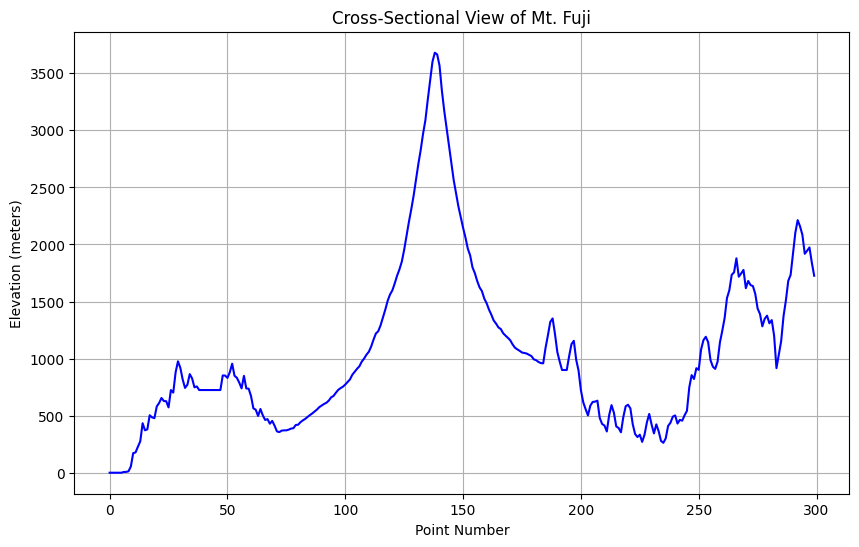

Gradients:  [0.         0.         0.         0.         0.         0.02055901
 0.0018323  0.01549689 0.13108696 0.3626935 ]
Next point after applying the gradient descent formula: 0


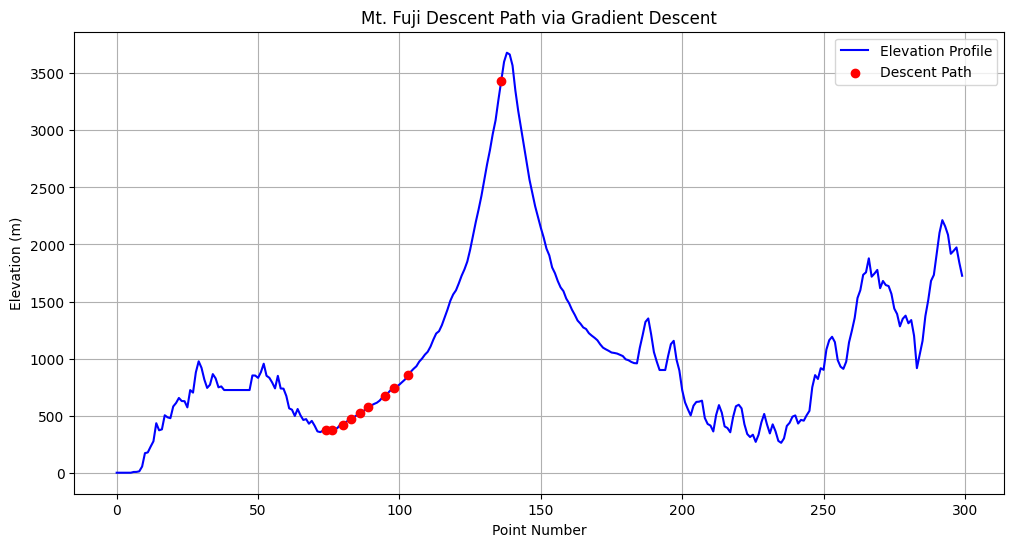

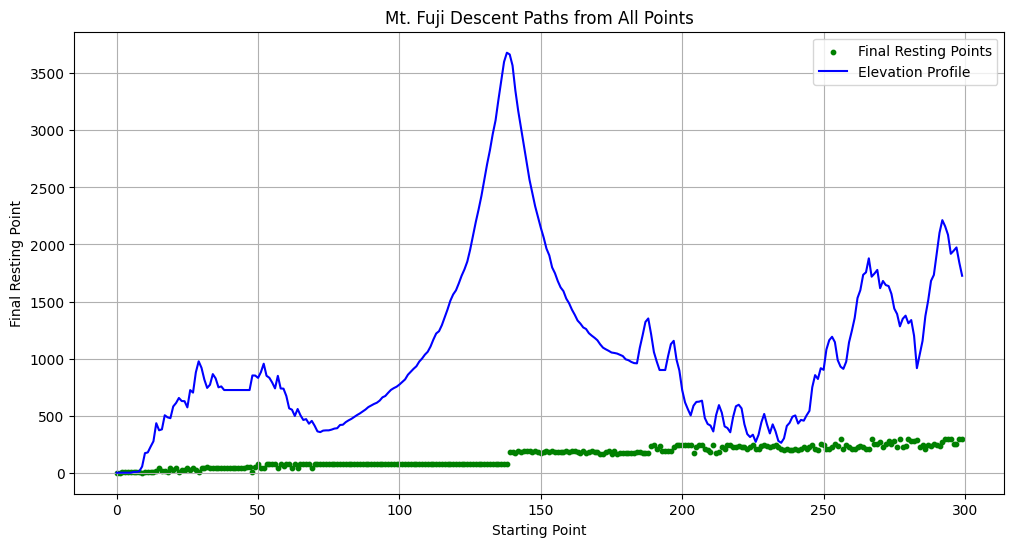

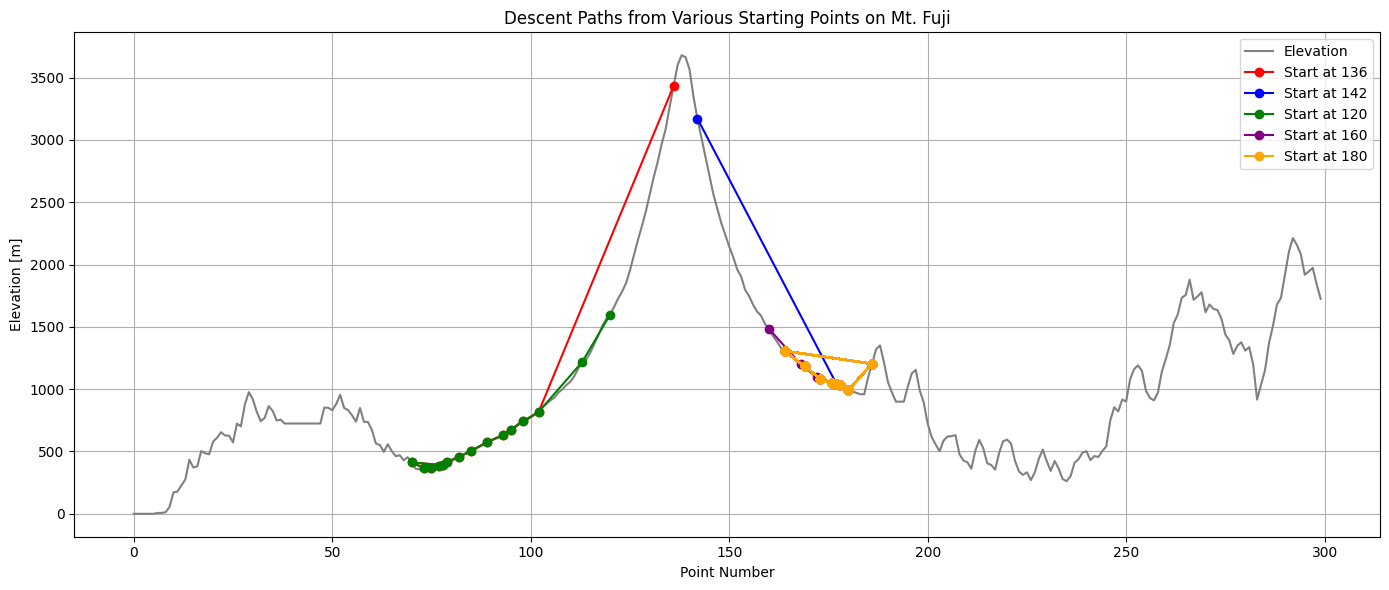

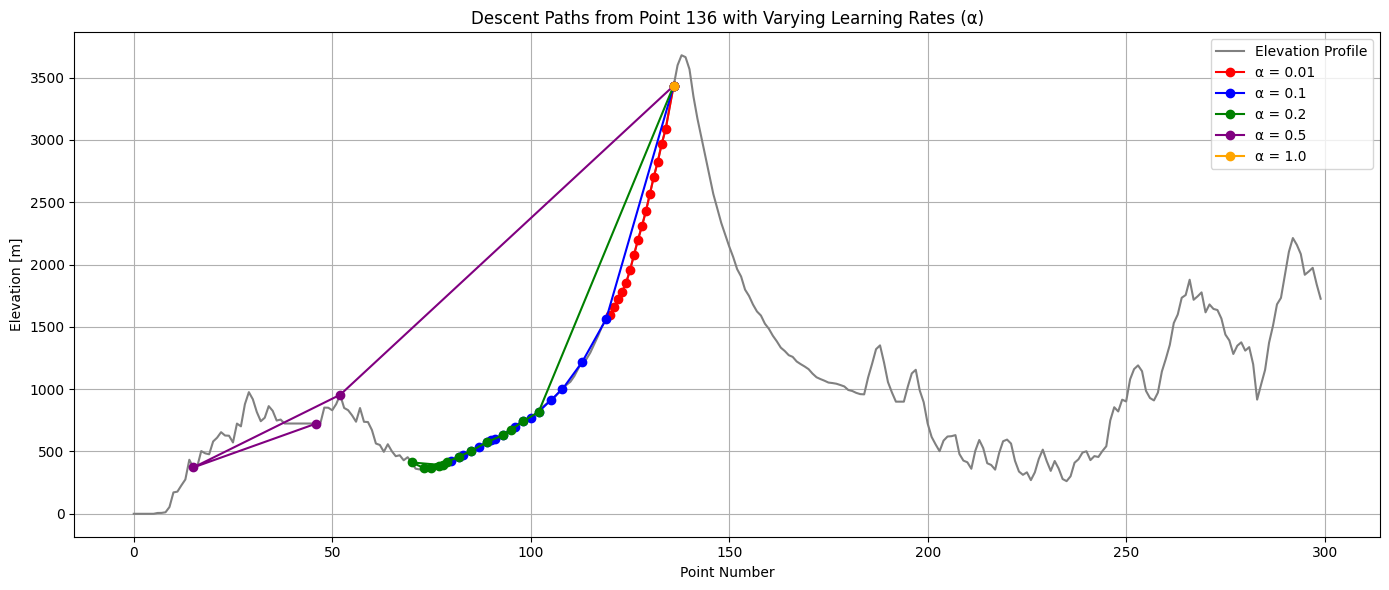

In [1]:
import numpy as np


csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)


import numpy as np
import matplotlib.pyplot as plt

# Load data from the CSV file
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"  # Use raw string to handle backslashes

# Assuming the columns in the CSV are:
# "point number", "latitude", "longitude", "elevation", "distance from point 0"
data = np.loadtxt(csv_path, delimiter=',', skiprows=1)

# Extracting the "elevation" and "point number" columns
point_numbers = data[:, 0]  # First column is the point number
elevation = data[:, 3]      # Fourth column is the elevation

# Ploting the elevation data
plt.figure(figsize=(10, 6))
plt.plot(point_numbers, elevation, label="Elevation", color='b')
plt.xlabel('Point Number')
plt.ylabel('Elevation (meters)')
plt.title('Cross-Sectional View of Mt. Fuji')
plt.grid(True)
plt.show()



import numpy as np

# Load the Mt. Fuji data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"  # Specify the path to your CSV file
data = np.loadtxt(csv_path, delimiter=',', skiprows=1)

# Extract the "point number", "elevation", and "distance from point 0" columns
point_numbers = data[:, 0]  # First column: point number
elevation = data[:, 3]      # Fourth column: elevation
distance = data[:, 4]       # Fifth column: distance from point 0

# Function to calculate the gradient between consecutive points
def compute_gradient(elevation, distance):
    gradients = []
    
    # Looping through the elevations and distances to calculate the gradient
    for i in range(len(elevation) - 1):  # We are using (point i) and (point i+1)
        delta_elevation = elevation[i + 1] - elevation[i]
        delta_distance = distance[i + 1] - distance[i]
        
        # Computing the gradient (slope)
        gradient = delta_elevation / delta_distance
        gradients.append(gradient)
    
    return np.array(gradients)

# the gradient
gradients = compute_gradient(elevation, distance)

# Display the first few gradients
print("Gradients: ", gradients[:10])  # Print first 10 gradients




import numpy as np

# Load the Mt. Fuji data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"  # Specify the path to your CSV file
data = np.loadtxt(csv_path, delimiter=',', skiprows=1)

# Extract the "point number", "elevation", and "distance from point 0" columns
point_numbers = data[:, 0]  # First column: point number
elevation = data[:, 3]      # Fourth column: elevation
distance = data[:, 4]       # Fifth column: distance from point 0

# Function to calculate the gradient between consecutive points
def compute_gradient(elevation, distance):
    gradients = []
    
    # Loop through the elevations and distances to calculate the gradient
    for i in range(len(elevation) - 1):  # We are using (point i) and (point i+1)
        delta_elevation = elevation[i + 1] - elevation[i]
        delta_distance = distance[i + 1] - distance[i]
        
        # Computing the gradient (slope)
        gradient = delta_elevation / delta_distance
        gradients.append(gradient)
    
    return np.array(gradients)

# the gradient
gradients = compute_gradient(elevation, distance)

# Function to calculate the next point to move to based on the current gradient
def compute_next_point(current_point, gradient, alpha=0.2):
    """
    Calculate the next point to move to based on the gradient and learning rate alpha.
    
    Parameters:
    ----------------
    current_point : int
      The current point number (index).
    gradient : float
      The gradient of the current point.
    alpha : float
      The learning rate (step size).
      
    Returns:
    ----------------
    next_point : int
      The index of the next point to move to.
    """
    # Calculating the destination point
    destination_point = current_point - alpha * gradient
    
    # Round to the nearest integer
    next_point = round(destination_point)
    
    # Ensure the next point is valid (i.e., within bounds)
    next_point = max(0, min(next_point, len(elevation) - 1))
    
    return next_point

# Calculate the next point from the first point (point 0) using the first gradient
current_point = 0  # Starting from the first point
gradient_at_current_point = gradients[current_point]  # Gradient at the first point
alpha = 0.2  # Hyperparameter (learning rate)

# Calculating the next point
next_point = compute_next_point(current_point, gradient_at_current_point, alpha)
print(f"Next point after applying the gradient descent formula: {next_point}")




import numpy as np

# Load data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"
data = np.loadtxt(csv_path, delimiter=',', skiprows=1)

# Extract columns
elevation = data[:, 3]      # Elevation
distance = data[:, 4]       # Distance from point 0

# Computing gradient between adjacent points
def compute_gradient(elevation, distance):
    gradients = []
    for i in range(len(elevation) - 1):
        delta_elevation = elevation[i + 1] - elevation[i]
        delta_distance = distance[i + 1] - distance[i]
        gradients.append(delta_elevation / delta_distance)
    return np.array(gradients)

# Computing next point using gradient descent formula
def compute_next_point(current_point, gradient, alpha=0.2):
    destination_point = current_point - alpha * gradient
    next_point = round(destination_point)
    next_point = max(0, min(next_point, len(elevation) - 1))  # Bound within valid range
    return next_point

# Simulation of descending the mountain
def descend_mountain(start_point, elevation, distance, alpha=0.2):
    gradients = compute_gradient(elevation, distance)
    path = [start_point]
    current_point = start_point

    while True:
        if current_point >= len(gradients):  # Last point has no gradient
            break
        gradient = gradients[current_point]
        next_point = compute_next_point(current_point, gradient, alpha)

        if next_point == current_point:
            # No further descent possible — has converged
            break

        path.append(next_point)
        current_point = next_point

    return path



import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"  # Use raw string (r"...") to avoid path errors
fuji_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract the relevant columns
points = np.arange(len(fuji_data))  # 0 to 299
elevations = fuji_data[:, 3]  # Elevation column

# Function to compute gradient
def compute_gradient(elevations):
    """
    Compute the gradient (change in elevation) at each point.
    """
    gradients = np.diff(elevations)  # Calculate differences
    return np.append(gradients, gradients[-1])  # Keep the array size consistent

# Function to compute the next point based on the gradient
def compute_next_point(current_point, gradients, alpha=0.2):
    """
    Calculate the next descent point using the gradient.
    """
    next_point = round(current_point - alpha * gradients[current_point])
    
    # next_point should be within valid range
    if next_point < 0 or next_point >= len(elevations):
        return current_point  # Stop descent if out of range
    
    return next_point

# Function to perform gradient descent from the summit
def descend_mountain(start_point, elevations, alpha=0.2):
    """
    Perform gradient descent starting from the given point.
    Returns a list of visited points.
    """
    gradients = compute_gradient(elevations)
    descent_path = [start_point]
    current_point = start_point

    while True:
        next_point = compute_next_point(current_point, gradients, alpha)

        if next_point == current_point:  # Stop if no movement
            break

        descent_path.append(next_point)
        current_point = next_point

    return descent_path

#  from point 136 (near the summit)
start_point = 136
descent_path = descend_mountain(start_point, elevations, alpha=0.2)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(points, elevations, label="Elevation Profile", color='blue')
plt.scatter(descent_path, elevations[descent_path], color='red', label="Descent Path", zorder=3)


plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Mt. Fuji Descent Path via Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()



import numpy as np
import matplotlib.pyplot as plt

# Load CSV data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"
fuji_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant columns
points = np.arange(len(fuji_data))  # Points from 0 to 299
elevations = fuji_data[:, 3]  # Elevation column

# Compute gradient efficiently
gradients = np.diff(elevations, prepend=elevations[0])  # Ensure same length

def descend_mountain(start_point, elevations, gradients, alpha=0.2, max_steps=100):
    """
    Optimized function to simulate descent from a given point.
    Uses NumPy for speed.
    """
    descent_path = [start_point]
    current_point = start_point

    for _ in range(max_steps):  # Prevent infinite loops
        next_point = round(current_point - alpha * gradients[current_point])

        # Stop if next point is invalid or no movement occurs
        if next_point < 0 or next_point >= len(elevations) or next_point == current_point:
            break

        descent_path.append(next_point)
        current_point = next_point

    return descent_path[-1]  # Return final resting place

# Vectorized descent calculation for all points
final_destinations = np.array([descend_mountain(start, elevations, gradients) for start in range(len(elevations))])

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(points, final_destinations, color='green', label="Final Resting Points", s=10)
plt.plot(points, elevations, label="Elevation Profile", color='blue')

plt.xlabel("Starting Point")
plt.ylabel("Final Resting Point")
plt.title("Mt. Fuji Descent Paths from All Points")
plt.legend()
plt.grid(True)
plt.show()




import numpy as np
import matplotlib.pyplot as plt

#Load the CSV file
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"
fuji_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract relevant data
points = np.arange(len(fuji_data))
elevations = fuji_data[:, 3]
gradients = np.diff(elevations, prepend=elevations[0])

#Function to compute the full descent path from a starting point 
def full_descent_path(start_point, elevations, gradients, alpha=0.2, max_steps=100):
    path = [start_point]
    current = start_point
    for _ in range(max_steps):
        next_point = round(current - alpha * gradients[current])
        if next_point < 0 or next_point >= len(elevations) or next_point == current:
            break
        path.append(next_point)
        current = next_point
    return path

#few interesting starting points
starting_points = [136, 142, 120, 160, 180]

#elevation profile
plt.figure(figsize=(14, 6))
plt.plot(points, elevations, label="Elevation", color="gray")

#descent paths for each starting point
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, start in enumerate(starting_points):
    path = full_descent_path(start, elevations, gradients)
    path_elev = elevations[path]
    plt.plot(path, path_elev, marker='o', label=f"Start at {start}", color=colors[i])


plt.title("Descent Paths from Various Starting Points on Mt. Fuji")
plt.xlabel("Point Number")
plt.ylabel("Elevation [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt

#Load the CSV data
csv_path = r"C:\Users\Admin\Downloads\mtfuji_data.csv"
fuji_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#Extract data
points = np.arange(len(fuji_data))
elevations = fuji_data[:, 3]
gradients = np.diff(elevations, prepend=elevations[0])

# Descent function for different alpha
def full_descent_path(start_point, elevations, gradients, alpha=0.2, max_steps=100):
    path = [start_point]
    current = start_point
    for _ in range(max_steps):
        next_point = round(current - alpha * gradients[current])
        if next_point < 0 or next_point >= len(elevations) or next_point == current:
            break
        path.append(next_point)
        current = next_point
    return path

#Try with different alpha values
alpha_values = [0.01, 0.1, 0.2, 0.5, 1.0]
start_point = 136
colors = ['red', 'blue', 'green', 'purple', 'orange']

#results
plt.figure(figsize=(14, 6))
plt.plot(points, elevations, label="Elevation Profile", color='gray')

for i, alpha in enumerate(alpha_values):
    path = full_descent_path(start_point, elevations, gradients, alpha=alpha)
    path_elev = elevations[path]
    plt.plot(path, path_elev, marker='o', label=f"α = {alpha}", color=colors[i])

plt.title(f"Descent Paths from Point {start_point} with Varying Learning Rates (α)")
plt.xlabel("Point Number")
plt.ylabel("Elevation [m]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


